## Decision Trees and Random Forests

### Data Loading

In [1]:
!git clone https://github.com/icomse/8th_workshop_MachineLearning.git
import os
os.chdir('8th_workshop_MachineLearning/data')

Cloning into '8th_workshop_MachineLearning'...
remote: Enumerating objects: 285, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 285 (delta 34), reused 28 (delta 13), pack-reused 221
Receiving objects: 100% (285/285), 44.25 MiB | 15.95 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [2]:
# Now we use pandas library to create a dataframe.
import numpy as np
import pandas as pd

Read in the prepared data

In [3]:
df_featurized=pd.read_csv('featurized_mixture.csv')

In [4]:
df_featurized.head()

,HBA,HBD,EXP. Data,Status,HBA:HBD,HBA_smiles,HBD_smiles,HBA_MaxAbsEStateIndex,HBA_MinEStateIndex,HBA_qed,...,HBD_EState_VSA3,HBD_EState_VSA4,HBD_EState_VSA8,HBD_EState_VSA9,HBD_VSA_EState1,HBD_VSA_EState3,HBD_VSA_EState5,HBD_VSA_EState7,HBD_VSA_EState8,HBD_FractionCSP3
0,choline chloride,ethyleneglycol,56.30,Training,0.5,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.38625,0.0,0.397593,...,0.0,0.0,0.0,10.213055,0.0,15.25,0.0,0.0,-0.25,1.0
1,choline chloride,ethyleneglycol,56.20,Training,0.5,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.38625,0.0,0.397593,...,0.0,0.0,0.0,10.213055,0.0,15.25,0.0,0.0,-0.25,1.0
2,choline chloride,ethyleneglycol,55.95,Training,0.5,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.38625,0.0,0.397593,...,0.0,0.0,0.0,10.213055,0.0,15.25,0.0,0.0,-0.25,1.0
3,choline chloride,ethyleneglycol,55.85,Training,0.5,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.38625,0.0,0.397593,...,0.0,0.0,0.0,10.213055,0.0,15.25,0.0,0.0,-0.25,1.0
4,choline chloride,ethyleneglycol,55.75,Training,0.5,C[N+](C)(C)CCO.[Cl-],C(CO)O,8.38625,0.0,0.397593,...,0.0,0.0,0.0,10.213055,0.0,15.25,0.0,0.0,-0.25,1.0


In [9]:
df_featurized.tail()
print(df_featurized)

                                     HBA                       HBD  EXP. Data  \
768   methyltriphenylphosphonium bromide                  glycerol      58.94   
586                     choline chloride                  glycerol      46.40   
514                     choline chloride                  glycerol      67.50   
22                      choline chloride                      urea      66.08   
674   methyltriphenylphosphonium bromide    n-methyldiethanolamine      41.20   
..                                   ...                       ...        ...   
346                     choline chloride            1,2-butanediol      33.40   
213                     choline chloride               lactic acid      47.30   
169  n,n-diethylethanolammonium chloride  2,2,2-trifluoroacetamide      40.27   
36                      choline chloride                      urea      48.52   
638    allyltriphenylphosphonium bromide         triethyleneglycol      42.27   

       Status  HBA:HBD     

In [5]:
df_featurized.describe()

,EXP. Data,HBA:HBD,HBA_MaxAbsEStateIndex,HBA_MinEStateIndex,HBA_qed,HBA_SPS,HBA_MaxPartialCharge,HBA_MinPartialCharge,HBA_Ipc,HBA_PEOE_VSA1,...,HBD_EState_VSA3,HBD_EState_VSA4,HBD_EState_VSA8,HBD_EState_VSA9,HBD_VSA_EState1,HBD_VSA_EState3,HBD_VSA_EState5,HBD_VSA_EState7,HBD_VSA_EState8,HBD_FractionCSP3
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,7.710000e+02,771.000000,...,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,45.759493,0.896778,6.289846,-0.272988,0.443053,10.672407,0.097435,-0.985626,2.362617e+04,20.116406,...,4.822854,2.132598,0.823147,12.406675,1.136692,17.151928,-0.281854,-0.153848,0.468913,0.916219
std,9.483999,2.053535,2.766988,0.601788,0.068198,0.442242,0.013999,0.093103,8.157183e+04,2.841001,...,7.648994,6.299215,2.316669,4.403541,2.955222,8.063385,0.773704,1.528376,1.038049,0.236557
min,31.100000,0.053000,2.274306,-1.775154,0.397593,4.500000,-0.010576,-1.000000,2.754888e+00,5.733667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.018889,-7.040694,-1.159491,0.000000
25%,38.250000,0.125000,2.409722,0.000000,0.397593,10.500000,0.101493,-1.000000,1.814171e+01,16.981451,...,0.000000,0.000000,0.000000,10.213055,0.000000,15.250000,0.000000,-0.953704,-0.250000,1.000000
50%,45.600000,0.250000,8.386250,0.000000,0.397593,10.500000,0.101493,-1.000000,1.814171e+01,21.996591,...,0.000000,0.000000,0.000000,10.213055,0.000000,16.469028,0.000000,0.000000,0.390000,1.000000
75%,49.600000,0.500000,8.386250,0.000000,0.478945,10.714286,0.101493,-1.000000,5.034904e+03,21.996591,...,6.544756,0.000000,0.000000,15.319582,0.000000,16.759259,0.000000,0.000000,1.605278,1.000000
max,75.000000,11.000000,8.386250,0.000000,0.637261,11.333333,0.116075,-0.330474,1.792570e+06,21.996591,...,26.427528,25.683286,11.467335,25.532637,32.111111,44.972431,0.000000,3.827500,3.092593,1.000000


Shuffle the data, as there is some correlation in the inputs.

In [6]:
df_featurized=df_featurized.sample(frac=1.0)

## Splitting

In [7]:
# Splitting into train and test sets according to the original dataset
y_train = df_featurized[df_featurized['Status'] =='Training']['EXP. Data']
x_train = df_featurized[df_featurized['Status'] =='Training'].drop(['EXP. Data', 'HBD','HBD_smiles', 'Status', 'HBA', 'HBA_smiles'], axis=1)
y_test = df_featurized[df_featurized['Status'] =='Test']['EXP. Data']
x_test = df_featurized[df_featurized['Status'] =='Test'].drop(['EXP. Data', 'HBD','HBD_smiles', 'Status', 'HBA', 'HBA_smiles'], axis=1)
print('train size: ',x_train.shape[0])
print('test size: ',x_test.shape[0])

train size:  615
test size:  156


### Decision Trees

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [54]:
dt_model = tree.DecisionTreeRegressor(criterion='squared_error', splitter='random', max_depth=5, min_samples_split=15, min_samples_leaf=25, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=25, min_samples_split=15,
                      splitter='random')

In [55]:
y_pred_train = dt_model.predict(x_train)
y_pred_test = dt_model.predict(x_test)
print("Train MSE=",mean_squared_error(y_pred_train,y_train))
print("Test MSE=",mean_squared_error(y_pred_test,y_test))

Train MSE= 14.87139133043885
Test MSE= 17.19855562397145


In [56]:
np.unique(y_pred_test)

array([33.11818182, 35.35714286, 35.813125  , 36.88933333, 38.22903226,
       43.1055814 , 45.60270068, 49.84632143, 50.24093333, 54.43232258,
       56.92801613, 67.38574074])

In [57]:
print(y_pred_test)

[50.24093333 56.92801613 56.92801613 35.35714286 35.813125   35.813125
 33.11818182 67.38574074 54.43232258 49.84632143 49.84632143 45.60270068
 33.11818182 35.813125   45.60270068 45.60270068 36.88933333 50.24093333
 35.813125   54.43232258 45.60270068 38.22903226 45.60270068 50.24093333
 33.11818182 56.92801613 45.60270068 35.813125   56.92801613 35.35714286
 35.813125   43.1055814  43.1055814  35.813125   45.60270068 54.43232258
 67.38574074 45.60270068 49.84632143 49.84632143 45.60270068 45.60270068
 36.88933333 45.60270068 35.813125   33.11818182 35.813125   67.38574074
 35.35714286 45.60270068 45.60270068 45.60270068 49.84632143 56.92801613
 56.92801613 45.60270068 36.88933333 49.84632143 45.60270068 33.11818182
 35.35714286 49.84632143 38.22903226 45.60270068 45.60270068 67.38574074
 43.1055814  35.813125   49.84632143 50.24093333 45.60270068 45.60270068
 49.84632143 56.92801613 43.1055814  67.38574074 50.24093333 49.84632143
 49.84632143 49.84632143 49.84632143 43.1055814  56.9

Let's look at the tree!

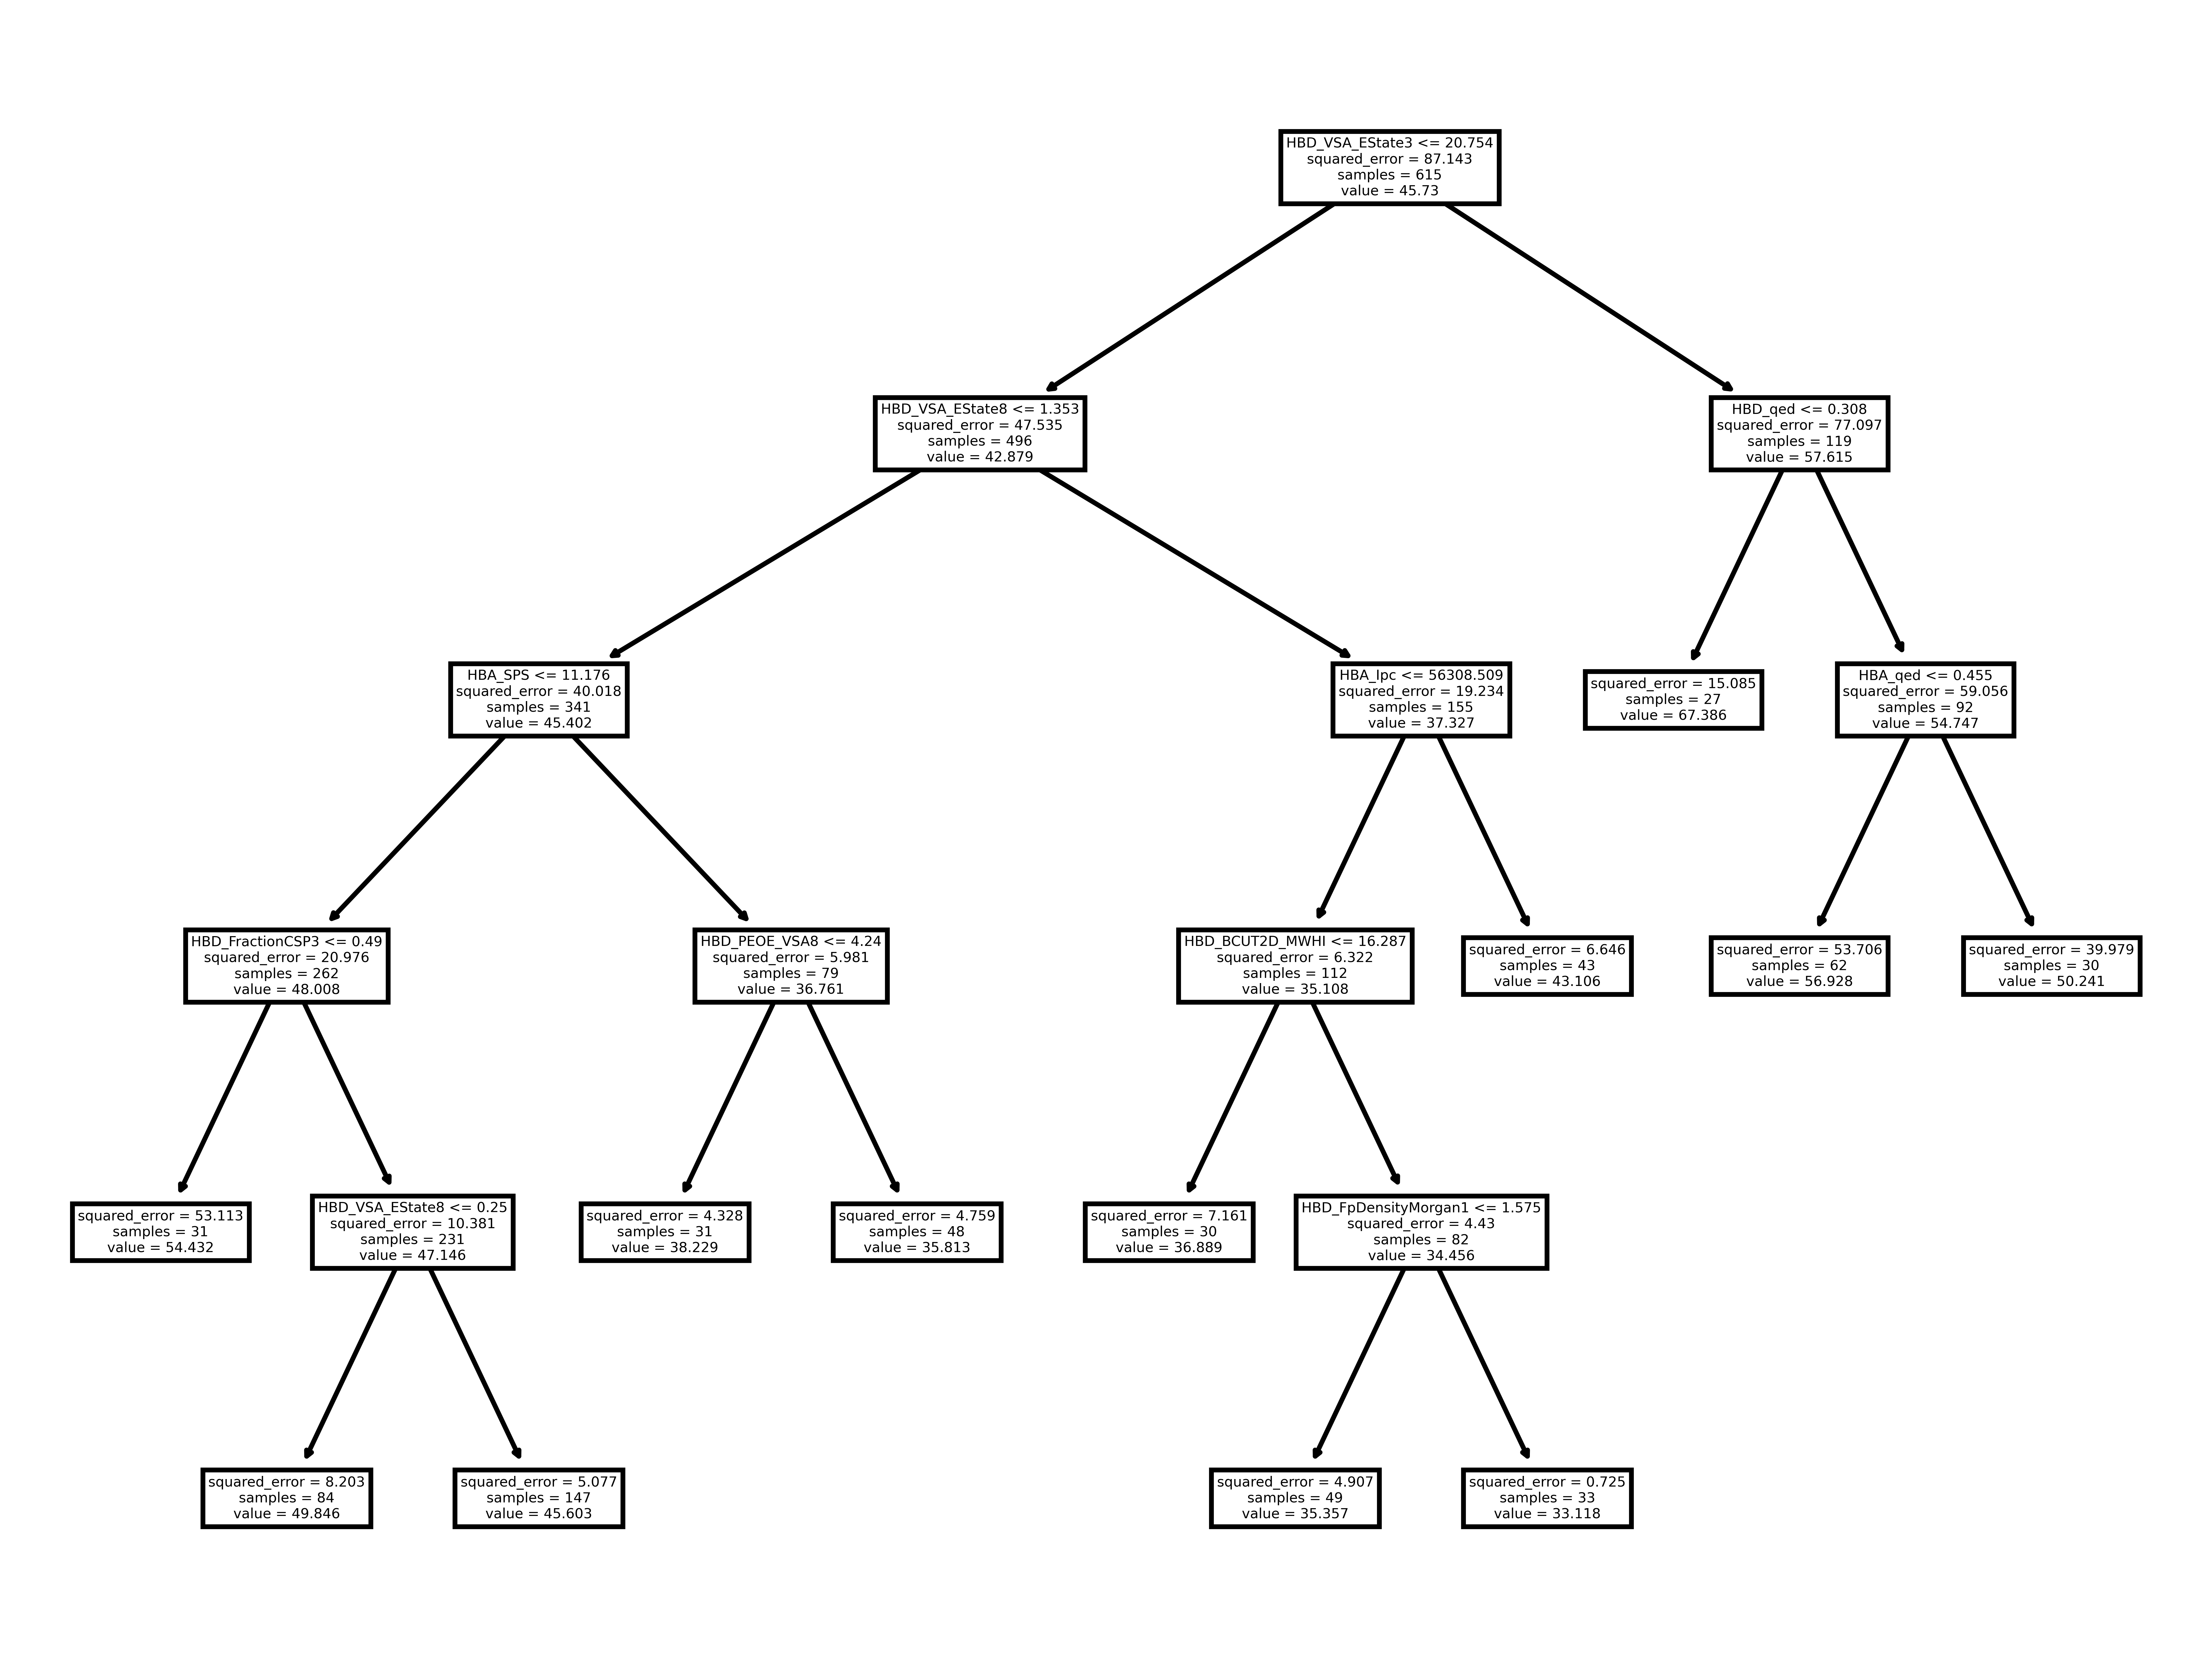

In [58]:
plt.figure(figsize=(8, 6), dpi=1200)
tree.plot_tree(dt_model,feature_names=x_train.columns)
plt.show()

**Hacking**: look up some of the decision tree options, and see if you can do better!  Remember, you want to do better on the TEST MSE.

### Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf_model = RandomForestRegressor(max_depth=5,
                                 n_estimators=200,
                                 min_samples_split=3,
                                 min_samples_leaf=1)
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_split=3, n_estimators=200)

In [70]:
rf_model = RandomForestRegressor(max_depth=5,
                                 n_estimators=100,
                                 criterion='squared_error',
                                min_samples_split=5, min_samples_leaf=4, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5)

In [71]:
y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)
print("Train MSE=",mean_squared_error(y_pred_train,y_train))
print("Test MSE=",mean_squared_error(y_pred_test,y_test))
print("Train MAE=",mean_absolute_error(y_pred_train,y_train))
print("Test MAE=",mean_absolute_error(y_pred_test,y_test))

Train MSE= 6.200381895003502
Test MSE= 6.041697046300965
Train MAE= 1.7088124537809917
Test MAE= 1.7805598652723535


Are we going to try to visualize these!  NO!

**Hacking**: Look up some of the additional random forest options, and see if you can do better!

[Text(0.46621621621621623, 0.9166666666666666, 'x[44] <= -0.388\nsquared_error = 82.87\nsamples = 381\nvalue = 45.271'),
 Text(0.21621621621621623, 0.75, 'x[0] <= 0.464\nsquared_error = 72.194\nsamples = 60\nvalue = 58.828'),
 Text(0.13513513513513514, 0.5833333333333334, 'x[0] <= 0.188\nsquared_error = 47.917\nsamples = 37\nvalue = 54.227'),
 Text(0.05405405405405406, 0.4166666666666667, 'x[0] <= 0.068\nsquared_error = 6.105\nsamples = 14\nvalue = 60.007'),
 Text(0.02702702702702703, 0.25, 'squared_error = 2.561\nsamples = 6\nvalue = 61.553'),
 Text(0.08108108108108109, 0.25, 'x[0] <= 0.143\nsquared_error = 4.253\nsamples = 8\nvalue = 58.223'),
 Text(0.05405405405405406, 0.08333333333333333, 'squared_error = 5.993\nsamples = 4\nvalue = 58.014'),
 Text(0.10810810810810811, 0.08333333333333333, 'squared_error = 2.112\nsamples = 4\nvalue = 58.467'),
 Text(0.21621621621621623, 0.4166666666666667, 'x[3] <= 0.541\nsquared_error = 28.241\nsamples = 23\nvalue = 49.005'),
 Text(0.1891891891891

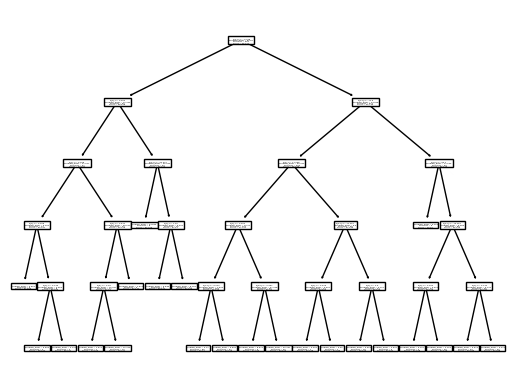

In [75]:
from sklearn import tree
tree.plot_tree(rf_model.estimators_[10])

### Hyperparameter search

Let's try to automate the process above.  `scikit-learn` has code to do this!  It's called `GridSearchCV`, Grid, and it peforms cross-validation on a whole list of parameters.

In [76]:
import sklearn

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Hyperparameter tuning and cross validation
param_grid = {
    'n_estimators': [50,100],  # Number of trees
    'max_depth': [5, 10, 20],      # Maximum depth of each tree
    'max_features': [1.0, 'sqrt', 'log2'],    # Number of features to consider at each split
    'min_samples_split': [2,3,4],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1,2,3]     # Minimum number of samples required at each leaf node
}
rf_model = RandomForestRegressor()  # model creation
grid_search = GridSearchCV(rf_model,
                           param_grid=param_grid,
                           cv=5,
                           verbose=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True) # will go through all possible combinations in the param grid
grid_search.fit(x_train,y_train) # fitting to train set

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END max_depth=5, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=-5.552, test=-6.087) total time=   0.2s
[CV 2/5] END max_depth=5, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=-5.157, test=-6.932) total time=   0.2s
[CV 3/5] END max_depth=5, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=-5.591, test=-5.865) total time=   0.2s
[CV 4/5] END max_depth=5, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=-5.018, test=-9.265) total time=   0.2s
[CV 5/5] END max_depth=5, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=-5.028, test=-7.126) total time=   0.2s
[CV 1/5] END max_depth=5, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-5.529, test=-6.368) total time=   0.4s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [80]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


This can be pretty random!  Last time I ran this I got:
```
Best hyperparameters:  {'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100} ```

training score:  0.955
test score:  0.951


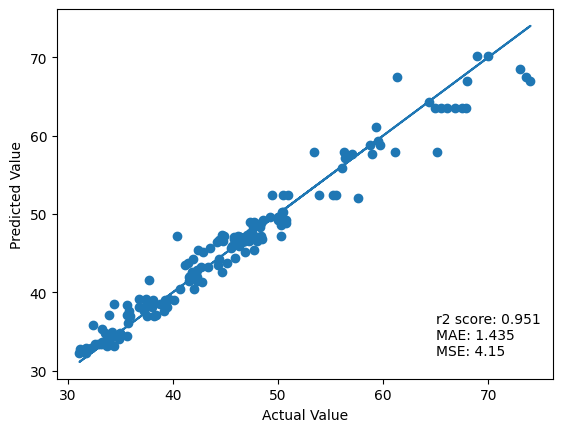

In [81]:
# Now, let's see the performance on our held out test set
rf_model = RandomForestRegressor(**grid_search.best_params_).fit(x_train,y_train)
print('training score: ',r2_score(rf_model.predict(x_train),y_train).round(3))
print('test score: ', r2_score(rf_model.predict(x_test),y_test).round(3))

#parity plot
plt.scatter(y_test, rf_model.predict(x_test))
plt.plot(y_test,y_test)
plt.text(65, 36, s ='r2 score: {}'.format(r2_score(rf_model.predict(x_test), y_test).round(3)))
plt.text(65, 34, s ='MAE: {}'.format(mean_absolute_error(rf_model.predict(x_test), y_test).round(3)))
plt.text(65, 32, s ='MSE: {}'.format(mean_squared_error(rf_model.predict(x_test), y_test).round(3)))
plt.xlabel('Actual Value')
_ = plt.ylabel('Predicted Value')

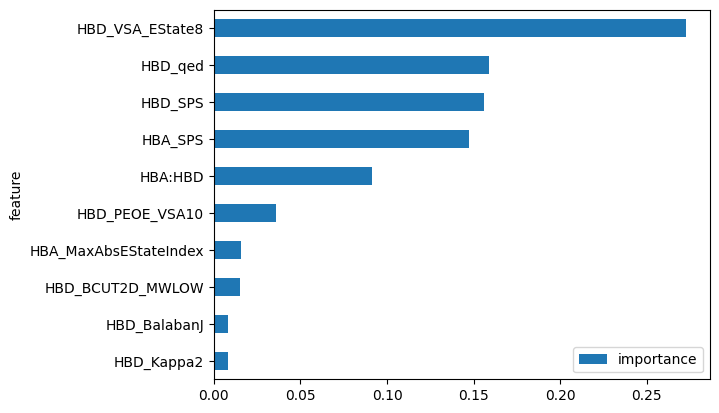

In [82]:
#Analizing most important features
df_ft_imp_rf = pd.DataFrame({'feature': x_train.columns,'importance': rf_model.feature_importances_}).sort_values('importance',ascending=True)
df_ft_imp_rf.tail(10).plot.barh('feature','importance')
plt.show()

# Some parting words
Some things to keep in mind about random forest methods
*   It's a fairly robust model, and usually doesn't overfit
*   As it's a tree based model, scaling of the data is not required
*   It's not good at extrapolation, see here: https://www.kaggle.com/code/carlmcbrideellis/extrapolation-do-not-stray-out-of-the-forest





